In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoCV, LassoLarsCV, RandomizedLasso

In [24]:
# Nicely prints coefficients of linear models [0].
# [0]: http://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/
def prettyprint(coefs, names=None, sort=False, n_coefs=20):
    if names is None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x:-np.abs(x[0]))
    return " + \n".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

In [28]:
data = pd.read_csv('../data/pipeline-20s-eyesc/ya-oa-slope-matrix.csv', index_col=0)
data = data[data['Class'].isin(['DANE'])]

In [29]:
data.columns = map(str.upper, data.columns)
data['SEX'] = data['SEX'].map({1:1, 2:0})

In [30]:
data.head()

,SUBJECT,CLASS,AGE,SEX,AVG_PSD_SLOPE,A1_FPZ,A2_FP1,A3_FP3,A4_AF1,A5_AFZ,...,B20 RM G,B21_CPZ,B22 CPZ,B23 CPZ,B24 CPZ,B26 CPZ,B27 CPZ,B28_PZ,B29 PZ,B30 PZ
54,118113,DANE,34.0,1.0,-4.332764,-4.539363,-3.753968,-3.875059,-3.873274,-5.132950,...,-4.854609,-4.329577,-4.388035,-3.273514,-4.747564,-4.018532,-6.892418,-4.706539,-4.454610,-8.221649
56,118135,DANE,52.0,0.0,-4.794060,-7.053615,-3.988085,-3.563032,-4.203308,-4.880165,...,-4.397648,-5.664258,-5.829092,-5.804309,-5.220573,-4.798523,-5.133021,-5.579092,-4.660642,-4.653032
57,118167,DANE,44.0,1.0,-3.329300,-3.512170,-2.626096,-0.547056,-4.112965,-4.135109,...,-5.463794,-4.782593,-4.830888,-4.404508,-4.443655,-4.151329,-4.204976,-4.903486,-4.862335,-4.243553
58,118204,DANE,35.0,0.0,-4.061329,-3.690887,-3.908408,-5.219734,-3.965890,-3.871459,...,-4.553696,-0.929706,-2.768768,-4.539342,-5.247768,-4.980005,-6.283644,-6.333878,-4.495755,-4.789851
59,118208,DANE,39.0,0.0,-4.734237,-3.771362,-3.983302,-6.403026,-3.748759,-4.267765,...,-6.987951,-3.573803,-7.773392,-7.759866,-5.214477,-4.653239,-4.549780,-7.207104,-4.850684,-4.672064


In [31]:
target = data.AGE

In [32]:
cols = list(data.columns.values)
cols.remove('SUBJECT')
cols.remove('CLASS')
cols.remove('AGE')
cols.remove('SEX')
predictors = data[cols]

In [33]:
pred_train, pred_test, target_train, target_test = train_test_split(predictors, target,
                                                                    test_size=.3,
                                                                    random_state=151)

In [39]:
alphas = np.linspace(0, 1, 100)
model = RandomizedLasso(alpha=alphas, random_state=42).fit(pred_train, target_train)
# print(dict(zip(predictors.columns, model.coef_)))
# print(prettyprint(model.coef_, predictors.columns, sort=True))

AttributeError: 'RandomizedLasso' object has no attribute 'coef_'

In [41]:
model.scores_

array([ 0.015,  0.41 ,  0.16 ,  0.58 ,  0.2  ,  0.605,  0.275,  0.235,
        0.235,  0.325,  0.795,  0.64 ,  0.275,  0.295,  0.33 ,  0.25 ,
        0.605,  0.36 ,  0.195,  0.165,  0.235,  0.29 ,  0.56 ,  0.285,
        0.17 ,  0.405,  0.39 ,  0.295,  0.42 ,  0.675,  0.385,  0.175,
        0.47 ,  0.515,  0.655,  0.295,  0.23 ,  0.305,  0.465,  0.185,
        0.265,  0.285,  0.425,  0.505,  0.23 ,  0.44 ,  0.545,  0.345,
        0.5  ,  0.56 ,  0.325,  0.36 ,  0.375,  0.56 ])

In [63]:
model.scores_

array([ 0.015,  0.41 ,  0.16 ,  0.58 ,  0.2  ,  0.605,  0.275,  0.235,
        0.235,  0.325,  0.795,  0.64 ,  0.275,  0.295,  0.33 ,  0.25 ,
        0.605,  0.36 ,  0.195,  0.165,  0.235,  0.29 ,  0.56 ,  0.285,
        0.17 ,  0.405,  0.39 ,  0.295,  0.42 ,  0.675,  0.385,  0.175,
        0.47 ,  0.515,  0.655,  0.295,  0.23 ,  0.305,  0.465,  0.185,
        0.265,  0.285,  0.425,  0.505,  0.23 ,  0.44 ,  0.545,  0.345,
        0.5  ,  0.56 ,  0.325,  0.36 ,  0.375,  0.56 ])

In [47]:
len(cols)

54

In [59]:
x = dict(list(zip(cols, model.scores_)))
# for key, value in sorted(x.iteritems(), key=lambda (k,v): (v,k)):
#     print "%s: %s" % (key, value)

In [61]:
sorted(x.values())

[0.014999999999999999,
 0.16,
 0.16500000000000001,
 0.17000000000000001,
 0.17499999999999999,
 0.185,
 0.19500000000000001,
 0.20000000000000001,
 0.23000000000000001,
 0.23000000000000001,
 0.23499999999999999,
 0.23499999999999999,
 0.23499999999999999,
 0.25,
 0.26500000000000001,
 0.27500000000000002,
 0.27500000000000002,
 0.28499999999999998,
 0.28499999999999998,
 0.28999999999999998,
 0.29499999999999998,
 0.29499999999999998,
 0.29499999999999998,
 0.30499999999999999,
 0.32500000000000001,
 0.32500000000000001,
 0.33000000000000002,
 0.34499999999999997,
 0.35999999999999999,
 0.35999999999999999,
 0.375,
 0.38500000000000001,
 0.39000000000000001,
 0.40500000000000003,
 0.40999999999999998,
 0.41999999999999998,
 0.42499999999999999,
 0.44,
 0.46500000000000002,
 0.46999999999999997,
 0.5,
 0.505,
 0.51500000000000001,
 0.54500000000000004,
 0.56000000000000005,
 0.56000000000000005,
 0.56000000000000005,
 0.57999999999999996,
 0.60499999999999998,
 0.60499999999999998,
 0

In [64]:
sorted(x.items(), key=lambda x:x[1])

[('AVG_PSD_SLOPE', 0.014999999999999999),
 ('A2_FP1', 0.16),
 ('A22 LM', 0.16500000000000001),
 ('A27 LM', 0.17000000000000001),
 ('B4_FP4', 0.17499999999999999),
 ('B13 P6 G', 0.185),
 ('A21 LM', 0.19500000000000001),
 ('A4_AF1', 0.20000000000000001),
 ('B20 RM G', 0.23000000000000001),
 ('B10 P6 G', 0.23000000000000001),
 ('A8 F1', 0.23499999999999999),
 ('A23 LM', 0.23499999999999999),
 ('A7 F1', 0.23499999999999999),
 ('A16 CZ', 0.25),
 ('B14 P6 G', 0.26500000000000001),
 ('A6_F1', 0.27500000000000002),
 ('A13 FP5', 0.27500000000000002),
 ('B17 RM G', 0.28499999999999998),
 ('A26 LM', 0.28499999999999998),
 ('A24 LM', 0.28999999999999998),
 ('B9 FP6 G', 0.29499999999999998),
 ('A14_FCZ', 0.29499999999999998),
 ('A31 LM', 0.29499999999999998),
 ('B11 P6 G', 0.30499999999999999),
 ('A10_FP5', 0.32500000000000001),
 ('B27 CPZ', 0.32500000000000001),
 ('A15_CZ', 0.33000000000000002),
 ('B23 CPZ', 0.34499999999999997),
 ('A18 CZ', 0.35999999999999999),
 ('B28_PZ', 0.35999999999999999),


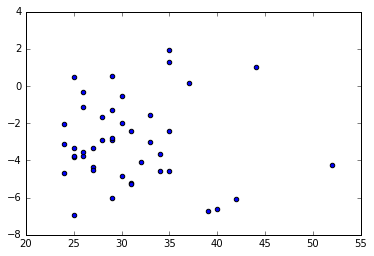

In [65]:
plt.scatter(data['AGE'], data['A11 FP5'])

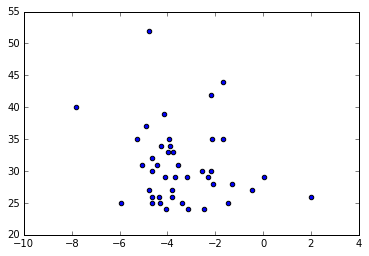

In [66]:
plt.scatter(data['B2 FP2'], data['AGE'])

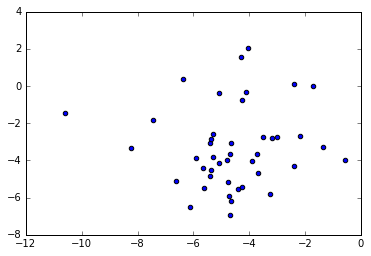

In [67]:
plt.scatter(data['B30 PZ'], data['A17 CZ'])